# 1.0 Imports

### 1.1 Libs

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import sweetviz as sv
import umap.umap_ as umap
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from plotly import express as px
from sklearn import cluster as c
from sklearn import metrics as mt
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn import manifold as mn
from sklearn import ensemble as en
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

### 1.2 Loading data

In [2]:
df_raw = pd.read_csv('../datasets/ecommerce.csv', encoding='unicode_escape', low_memory=False)

In [4]:
df_raw

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice  CustomerID         Country  Unnamed: 8  
0        29-Nov-16       2.55     17850.0  United Kingdom         NaN  
1        29-Nov-16       3.39     17850.0  United Kingdom         NaN  
2        29-Nov-16       2.75     17850.0  United Kingdom         NaN  
3        29-Nov-16       3.39     17850.0  United Kingdom         NaN  
4        29-Nov-16       3.39     17850.0  United Kingdom         NaN  
...            ...        ...         ...             ...         ...  
541904    7-Dec-17       0.85     12680.0          France         NaN  
541905    7-Dec-17       2.10     12680.0          France         NaN  
541906    7-Dec-17       4.15     12680.0          France         NaN  
541907    7-Dec-17       4.15     12680.0          France         NaN  
541908    7-Dec-17       4.95     12680.0          France         NaN  

[541909 rows x 9 columns]

# 2.0 Descrição dos dados

In [3]:
df1 = df_raw.copy()

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Unnamed: 8   0 non-null       float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


### 2.1 Renomear colunas

In [4]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id',
           'country', 'unnamed']

df1.columns = cols_new

### 2.2 Change types

In [5]:
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'])

### 2.3 Check NA

In [9]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
unnamed         541909
dtype: int64

### 2.4 Linhas duplicadas

In [10]:
linhas_duplicadas = df1[df1.duplicated(keep=False)].index
print("Linhas duplicadas:")
print(linhas_duplicadas)

Linhas duplicadas:
Index([   485,    489,    494,    517,    521,    527,    537,    539,    548,
          555,
       ...
       541644, 541646, 541655, 541656, 541666, 541675, 541689, 541692, 541699,
       541701],
      dtype='int64', length=10149)


In [11]:
df1.iloc[[485,489,494,517,521,527,537,539,548,555]]

invoice_no stock_code                        description  quantity  \
485     536409      22111       SCOTTIE DOG HOT WATER BOTTLE         1   
489     536409      22866      HAND WARMER SCOTTY DOG DESIGN         1   
494     536409      21866        UNION JACK FLAG LUGGAGE TAG         1   
517     536409      21866        UNION JACK FLAG LUGGAGE TAG         1   
521     536409      22900    SET 2 TEA TOWELS I LOVE LONDON          1   
527     536409      22866      HAND WARMER SCOTTY DOG DESIGN         1   
537     536409      22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539     536409      22111       SCOTTIE DOG HOT WATER BOTTLE         1   
548     536412      22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
555     536412      22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   

    invoice_date  unit_price  customer_id         country  unnamed  
485   2016-11-29        4.95      17908.0  United Kingdom      NaN  
489   2016-11-29        2.10      17908.0  United Kingdom      NaN  
494   2016-11-29        1.25      17908.0  United Kingdom      NaN  
517   2016-11-29        1.25      17908.0  United Kingdom      NaN  
521   2016-11-29        2.95      17908.0  United Kingdom      NaN  
527   2016-11-29        2.10      17908.0  United Kingdom      NaN  
537   2016-11-29        2.95      17908.0  United Kingdom      NaN  
539   2016-11-29        4.95      17908.0  United Kingdom      NaN  
548   2016-11-29        2.95      17920.0  United Kingdom      NaN  
555   2016-11-29        2.95      17920.0  United Kingdom      NaN

In [6]:
# eliminando linhas duplicadas
df1 = df1.drop_duplicates()

In [7]:
# eliminando coluna "unnamed"
df1.drop('unnamed', axis=1, inplace=True)

In [8]:
# 'resetando' os indices do dataframe
df1 = df1.reset_index(drop=True)

In [15]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135037
country              0
dtype: int64

### 2.5 Fillout NA

In [9]:
# o invoice_no é o numero da transação. para customer_id NaN, o invoice_no é o mesmo (para um conjunto)
# poderia associar um customer_id para as linhas que possuem o mesmo invoice_no

# Identificar os invoice_no únicos com NaN em customer_id
invoice_nan = df1[df1['customer_id'].isna()]['invoice_no'].unique()

# Criar valores únicos para cada grupo de invoice_no
invoice_value = {invoice: 20000 + i for i, invoice in enumerate(invoice_nan)}

# Substituir os NaN em customer_id 
df1['customer_id'] = df1.apply(lambda x: invoice_value[x['invoice_no']] if pd.isna(x['customer_id']) else x['customer_id'], axis=1)

In [10]:
# de maneira similar ao que foi feito para o invoice_no, agora para o description

# Criar um dicionário com a descrição para cada stock_code, sem incluir os NaN
stock = df1.dropna(subset=['description']).groupby('stock_code')['description'].first().to_dict()

# Substituir os NaN em description
df1['description'] = df1.apply(
    lambda x: stock.get(x['stock_code'], "nao-disponivel")
    if pd.isna(x['description']) else x['description'], axis=1)

In [18]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

In [19]:
df1[df1['description'] == 'nao-disponivel'].count()

invoice_no      112
stock_code      112
description     112
quantity        112
invoice_date    112
unit_price      112
customer_id     112
country         112
dtype: int64

### 2.6 Descriptive Statistics

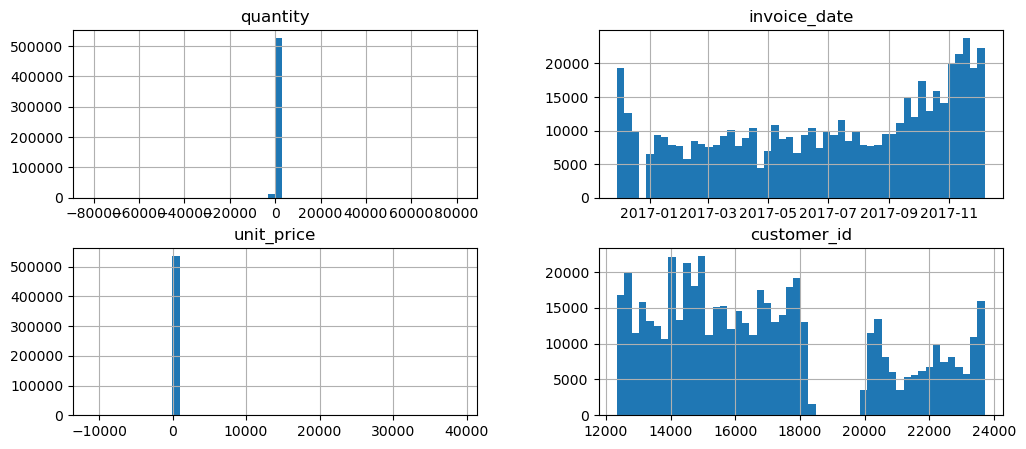

In [20]:
df1.hist(bins=50, figsize=(12,5));

In [11]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude =['int64', 'float64', 'datetime64[ns]'])

### 2.6.1 Numerical Attributes

In [22]:
stat_desc = df1.describe().T
stat_desc

count                           mean                  min  \
quantity      536640.0                       9.620043             -80995.0   
invoice_date    536640  2017-07-01 19:22:15.670840832  2016-11-29 00:00:00   
unit_price    536640.0                       4.632661            -11062.06   
customer_id   536640.0                   16948.911963              12346.0   

                              25%                  50%                  75%  \
quantity                      1.0                  3.0                 10.0   
invoice_date  2017-03-26 00:00:00  2017-07-17 00:00:00  2017-10-16 00:00:00   
unit_price                   1.25                 2.08                 4.13   
customer_id               14367.0              16255.0              20014.0   

                              max          std  
quantity                  80995.0    219.13036  
invoice_date  2017-12-07 00:00:00          NaN  
unit_price                38970.0    97.233208  
customer_id               23709.0  3291.353325

In [ ]:
# necessário investigar as quantidades negativas e o unit_price igual a zero

### 2.6.2 Categorical Attributes

##### **invoice number**

In [ ]:
# alguns invoice_no (que deveriam ser inteiros) apresentam letras

In [23]:
# problema: temos invoice com letras e números
# identificação:
df_letter_invoice = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :]
print('Total number of invoices: {}'.format(len(df_letter_invoice)))
print('Total number of negative quantity: {}'.format(len(df_letter_invoice[df_letter_invoice['quantity'] < 0])))

Total number of invoices: 9254
Total number of negative quantity: 9251


##### **stock code**

In [24]:
# checando stock_code que apresentam apenas caracteres:
df1.loc[df1['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z\s]+$', x))), 'stock_code'].unique()

array(['POST', 'D', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'm',
       'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [ ]:
# remover stock_code(com letras)

##### **description**

In [25]:
df1['description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [ ]:
# remover coluna description

##### **country**

In [26]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [27]:
df1['country'].value_counts(normalize=True).head()

country
United Kingdom    0.913646
Germany           0.017665
France            0.015916
EIRE              0.015250
Spain             0.004711
Name: proportion, dtype: float64

In [28]:
df1[['customer_id', 'country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id', ascending=False).head()

country  customer_id
36  United Kingdom         7587
14         Germany           95
13          France           90
10            EIRE           44
31           Spain           31

# 3.0 Filtragem de variáveis

In [12]:
df2 = df1.copy()

In [13]:
# --- Numerical attributes ---
df2 = df2.loc[df2['unit_price'] >= 0.04, :]

# --- Categorical attributes ---
df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'])]

df2 = df2.drop(columns='description', axis=1)

df2 = df2[~df2['country'].isin(['European Community', 'Unspecified'])]

# eliminando as linhas referentes a valores 'estranhos' de qtde_returns:
df2 = df2[~((df2['invoice_no'] == '581483') | (df2['invoice_no'] == 'C581484'))]  # referente a customer_id=16446
df2 = df2[~((df2['invoice_no'] == '541431') | (df2['invoice_no'] == 'C541433'))]  # referente a customer_id=12346
df2 = df2[~((df2['invoice_no'] == '540815') | (df2['invoice_no'] == 'C550456'))]  # referente a customer_id=15749

df2_return = df2.loc[df1['quantity'] < 0, :]  # produtos retornados
df2_purchase = df2.loc[df1['quantity'] >= 0, :]  # produtos comprados

In [ ]:
# para a variável 'quantity', linhas com valores negativos foram consideradas como sendo produtos retornados pelo 
# cliente ou pedidos cancelados

# 4.0 Feature Engineering

In [14]:
df3 = df2.copy()

### 4.1 Feature Creation

In [15]:
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True)

In [ ]:
# A segmentação dos clientes será 'baseada' no método RFM - uma ferramenta de segmentação de clientes que analisa
# o comportamento de compra baseado em três critérios: Recência, Frequência e Valor Monetário.
# Recência (R): o tempo decorrido desde a última compra do cliente. 
# Frequência (F): medida do número de compras realizadas por um cliente em um período específico.  
# Valor Monetário (M): o total gasto por um cliente. 

# Assim, como a tabela de dados não contém essas variáveis, vamos calculá-las:

##### **4.1.1 Gross Revenue**

In [16]:
# monetary (faturamento) = quantity*price --> soma produtos comprados - soma produtos retornados 
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
df_ref.isna().sum()

customer_id      0
gross_revenue    0
dtype: int64

##### **4.1.2 Recency - Days from last purchase**

In [17]:
# recency (last day purchase)
df_recency = df2_purchase[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2_purchase['invoice_date'].max() - df_recency['invoice_date']).dt.days # em relação à mais recente data do dataframe
df_recency = df_recency[['customer_id', 'recency_days']].copy() # pegando as colunas de interesse
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue     0
recency_days     67
dtype: int64

In [ ]:
# a diferença 67 se refere à diferença entre (df_ref - df_purchase(agrupado por customer_id)), 
# lembrando que 'stock_code'='BANK CHARGES' também foram eliminados do dataframe

##### **4.1.3 Frequency purchase**

In [18]:
df_aux = (df2[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                            .groupby('customer_id')
                                                            .agg(max_ = ('invoice_date', max),
                                                                 min_ = ('invoice_date', min),
                                                                 days_ = ('invoice_date', lambda x: ((x.max() - x.min()).days) + 1),
                                                                 buy_ = ('invoice_no', 'count')).reset_index())

df_aux['frequency'] = df_aux[['buy_', 'days_']].apply(lambda x: x['buy_'] / x['days_'] if x['days_'] != 0 else 0, axis=1)
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue     0
recency_days     67
frequency         0
dtype: int64

##### **4.1.4 Number of returns**

In [19]:
# número de devoluções
df_return = df2_return[['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'qtde_returns'})
df_return['qtde_returns'] = df_return['qtde_returns'].abs()

df_ref = pd.merge(df_ref, df_return, how='left', on='customer_id')
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0  # preenche os valores nan com zero
df_ref.isna().sum()

customer_id       0
gross_revenue     0
recency_days     67
frequency         0
qtde_returns      0
dtype: int64

# 5.0 EDA - Exploratory Data Analysis

In [20]:
df4 = df_ref.copy()
df4 = df_ref.dropna()
df4.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
frequency        0
qtde_returns     0
dtype: int64

In [21]:
df4.shape

(5694, 5)

### 5.1 **Análise Univariada**

In [ ]:
report = sv.analyze(df4)
report.show_html("report_v1.html")

In [ ]:
# o arquivo report_v1.html apresenta análises estatísticas das variáveis presentes no dataframe.

#### 5.1.1 **gross revenue**

In [ ]:
df4.sort_values('gross_revenue', ascending=False).head()

In [ ]:
df4.sort_values('gross_revenue', ascending=True).head()

In [ ]:
df3[df3['customer_id'] == 14646].head()

In [ ]:
df3[df3['customer_id'] == 17548].head()

#### 5.1.2 **qtde returns**

In [ ]:
df4.sort_values('qtde_returns', ascending=False).head(10)

In [ ]:
df1[df1['customer_id'] == 16446]  # parece haver um erro de pedido, talvez um cancelamento de compra

In [ ]:
df1[df1['customer_id'] == 12346]  # situação similar ao caso anterior

In [ ]:
df1[df1['customer_id'] == 15749]  # aqui também temos um caso estranho: produtos comprados, devolvidos e recomprados, aparentemente

In [ ]:
df1[df1['customer_id'] == 16029]

In [ ]:
# a ideia inicial é eliminar essas linhas envolvendo valores 'estranhos' de devoluções e suas respectivas compras
# por ex.: o customer_id=12346 teria a compra invoice_no=541431 e a compra invoice_no=C541433 eliminadas no dataframe

In [ ]:
df4.sort_values('qtde_returns', ascending=False).head(10)

### 5.2 **Análise Bivariada**

In [22]:
cols = ['customer_id']
df42 = df4.drop(cols, axis=1)

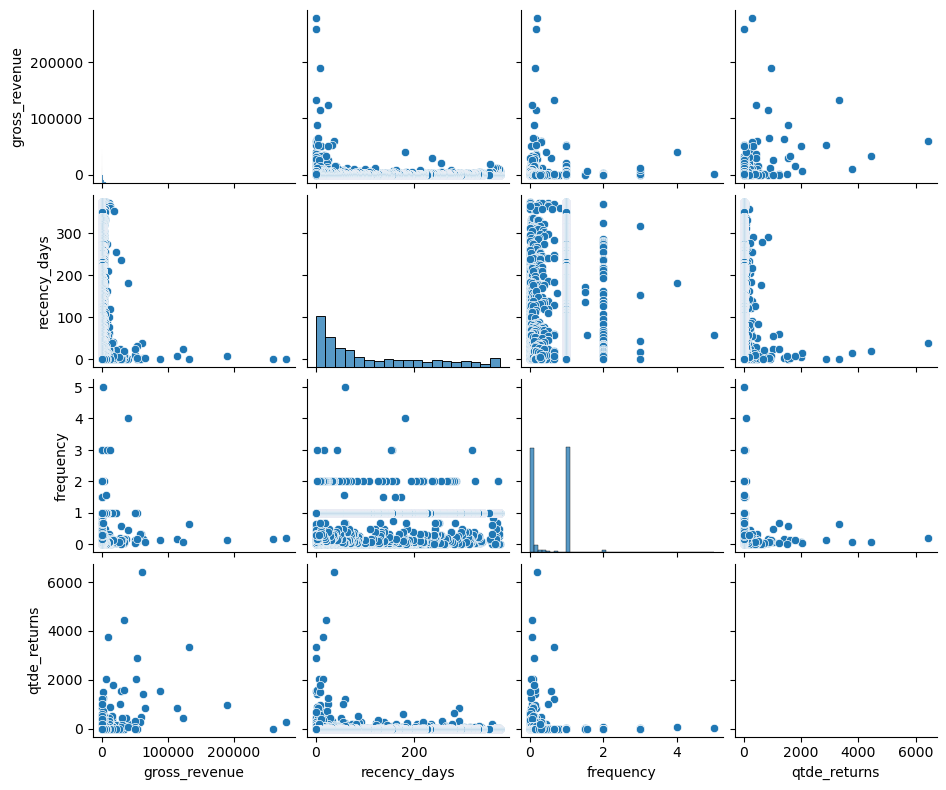

In [40]:
sns.pairplot(df42, height=2.0, aspect=1.2)

### 5.3 **Estudo do Espaço**

In [23]:
df43 = df4.drop(columns=['customer_id'], axis=1).copy()

In [ ]:
# antes de aplicar o pca, é necessário fazer a padronização dos dados:

In [24]:
mm = pp.MinMaxScaler()

df43['gross_revenue'] = mm.fit_transform(df43[['gross_revenue']])
df43['recency_days']  = mm.fit_transform(df43[['recency_days']])
df43['frequency']     = mm.fit_transform(df43[['frequency']])
df43['qtde_returns']  = mm.fit_transform(df43[['qtde_returns']])

X = df43.copy()

#### 5.3.1 **PCA (Principal Component Analysis)**

<BarContainer object of 4 artists>

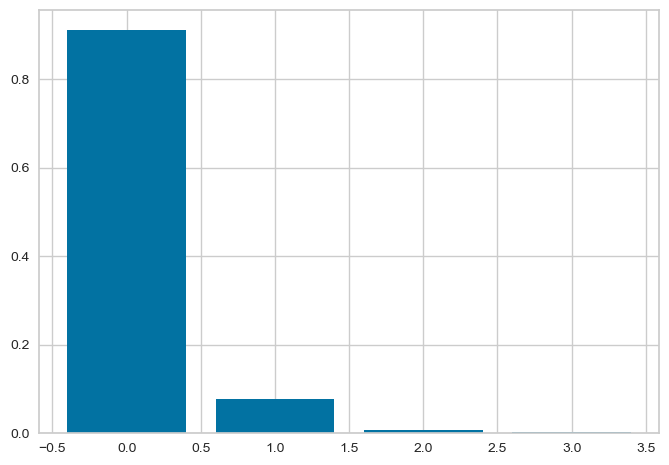

In [25]:
pca = dd.PCA(n_components=X.shape[1])  # reduzindo para X.shape dimensões

principal_components = pca.fit_transform(X)

# plot
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)

In [ ]:
# acima, vemos como cada componente do PC (PC1, PC2, PC3 e PC4) explicam a variância dos dados.

In [44]:
# verificando variância explicada:
print("Variância explicada por componente:", pca.explained_variance_ratio_)
print("Variância total explicada:", sum(pca.explained_variance_ratio_))

Variância explicada por componente: [0.91079615 0.07678482 0.00843517 0.00398386]
Variância total explicada: 1.0


In [ ]:
# contribuição de cada feature (0,1,2,3) para cada componente (PC1, PC2, PC3, PC4)

In [26]:
df_pca = pd.DataFrame(principal_components)
loadings = pd.DataFrame(
    pca.components_.T,  # para alinhar com as features
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df_pca.columns  # nome das features originais
)

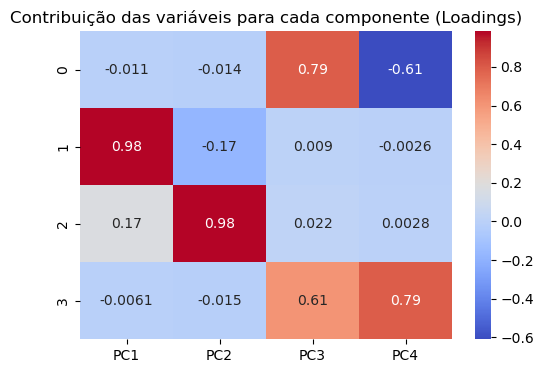

In [46]:
plt.figure(figsize=(6, 4))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('Contribuição das variáveis para cada componente (Loadings)')
plt.show()

In [ ]:
# relação das features originais (baseadas na soma das variâncias) com as componentes somadas de maior 
# variância (PC1 e PC2)

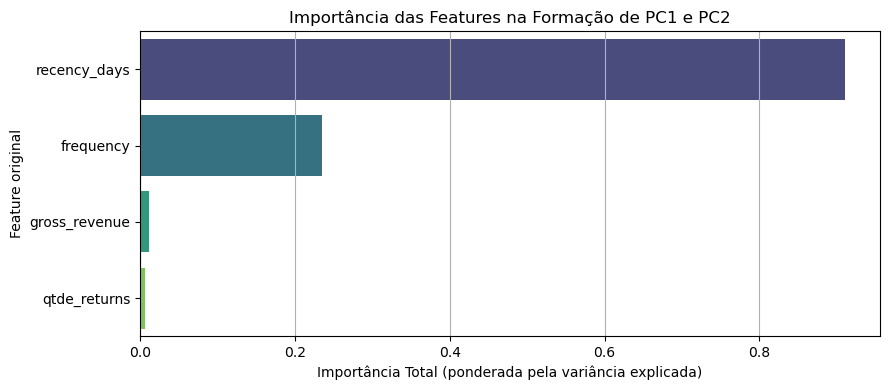

In [52]:
# selecionar os dois primeiros PCs (PC1 e PC2)
explained_var = pca.explained_variance_ratio_[:2]              # variância explicada por PC1 e PC2
abs_loadings = loadings.iloc[:, :2].abs()                      # loadings absolutos dos dois PCs

# soma dos loadings ponderados pela variância explicada
feature_importance = abs_loadings.mul(explained_var, axis=1).sum(axis=1)
feature_importance = feature_importance.sort_values(ascending=False) # ordenada em forma decrescente

loadings.index = X.columns # relacionando as features 0,1,2... com seus nomes originais

plt.figure(figsize=(9, 4))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.xlabel('Importância Total (ponderada pela variância explicada)')
plt.ylabel('Feature original')
plt.title('Importância das Features na Formação de PC1 e PC2')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [ ]:
# análise de segmentos com base no scatterplot (4 quadrantes):
# essa análise se baseia no fato que PC1 possui a recência como tendo maior peso
# e PC2 possui a frequência como tendo maior peso (vide heatmap dos loadings acima)
# assim: para PC1: valores altos → clientes recentes (compraram há pouco tempo)
#                  valores baixos → clientes inativos (não compram há muito tempo)
#        para PC2: valores altos → clientes frequentes
#                  valores baixos → clientes pouco frequentes

<Axes: xlabel='0', ylabel='1'>

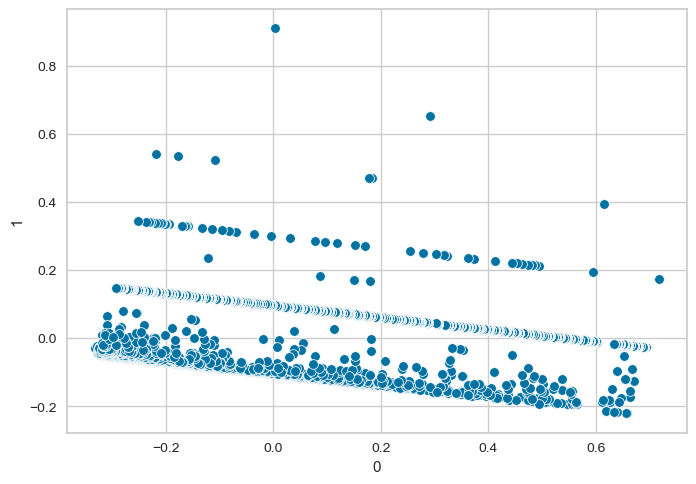

In [27]:
# plotando todos os dados no plano das duas primeiras componentes principais (PC1, PC2)
df_pca = pd.DataFrame(principal_components)
sns.scatterplot( x=0, y=1, data=df_pca )

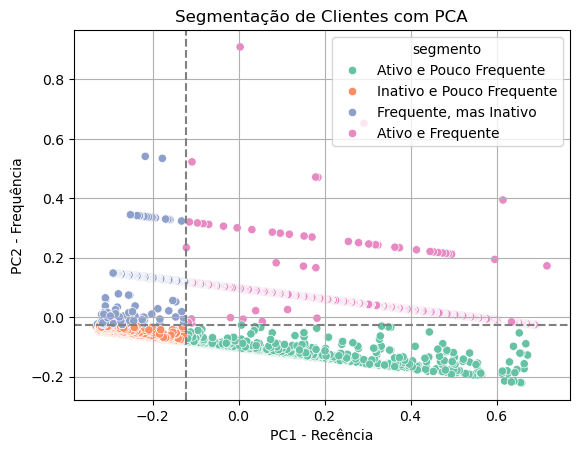

In [49]:
# criando segmentos com base na mediana
PC1 = 0
PC2 = 1
pc1_median = df_pca[PC1].median()
pc2_median = df_pca[PC2].median()

def segmentar_cliente(row):
    if row[PC1] >= pc1_median and row[PC2] >= pc2_median:
        return 'Ativo e Frequente'
    elif row[PC1] < pc1_median and row[PC2] >= pc2_median:
        return 'Frequente, mas Inativo'
    elif row[PC1] < pc1_median and row[PC2] < pc2_median:
        return 'Inativo e Pouco Frequente'
    else:
        return 'Ativo e Pouco Frequente'  # pode também indicar um cliente novo

df_pca['segmento'] = df_pca.apply(segmentar_cliente, axis=1)

sns.scatterplot(data=df_pca, x=PC1, y=PC2, hue='segmento', palette='Set2')
plt.axvline(x=pc1_median, color='gray', linestyle='--')
plt.axhline(y=pc2_median, color='gray', linestyle='--')
plt.title('Segmentação de Clientes com PCA')
plt.xlabel('PC1 - Recência')
plt.ylabel('PC2 - Frequência')
plt.grid(True)
plt.show()

In [50]:
df_pca.head()

0         1         2         3                   segmento
0  0.671863 -0.127163  0.018153 -0.007086    Ativo e Pouco Frequente
1 -0.177451 -0.065367  0.002115 -0.000527  Inativo e Pouco Frequente
2 -0.320260 -0.040914  0.012272 -0.006048  Inativo e Pouco Frequente
3 -0.075460 -0.089515 -0.006481 -0.000451    Ativo e Pouco Frequente
4  0.556911 -0.177583  0.001000  0.001356    Ativo e Pouco Frequente

In [51]:
# calculando valores médios das features para os segmentos:
df_enriquecido = df_pca.copy()
df_enriquecido['segmento'] = df_pca['segmento']

resumo_segmentos = df_enriquecido.groupby('segmento').agg({
    0: 'mean',
    3: 'mean',
    1: 'mean',
    2: 'mean'
}).round(5).sort_values(0, ascending=False)

resumo_segmentos

0        3        1        2
segmento                                                     
Ativo e Frequente          0.28915 -0.00012  0.04996  0.00012
Ativo e Pouco Frequente    0.13358  0.00067 -0.11309 -0.00282
Frequente, mas Inativo    -0.21554 -0.00050  0.12260  0.00163
Inativo e Pouco Frequente -0.25794  0.00005 -0.05358  0.00033

In [ ]:
# análise preliminar dos perfis de clientes para cada segmento:
Ativo e Frequente
    Alta receita, baixa recência, alta frequência.
    Perfil ideal: clientes fiéis e valiosos.
    Estratégia: manter o engajamento com recompensas.

Frequente, mas Inativo
    Gastam bem, mas não compram há muito tempo.
    Muitas devoluções: talvez insatisfação.
    Estratégia: reativação e escuta ativa (NPS, atendimento).

Ativo e Pouco Frequente (também há possibilidade de ser um cliente novo)
    Compraram recentemente, mas pouco.
    Potencial de crescimento.
    Estratégia: campanhas de onboarding e incentivo.

Inativo e Pouco Frequente
    Baixo valor, sem atividade recente.
    Pouco retorno esperado.
    Estratégia: campanha automatizada, ou foco em novos perfis.

#### 5.3.2 **UMAP (Uniform Manifold Approximation and Projection)**

In [ ]:
# para aplicar o umap, também é preciso padronizar os dados (já feito no início da seção Estudo do espaço)

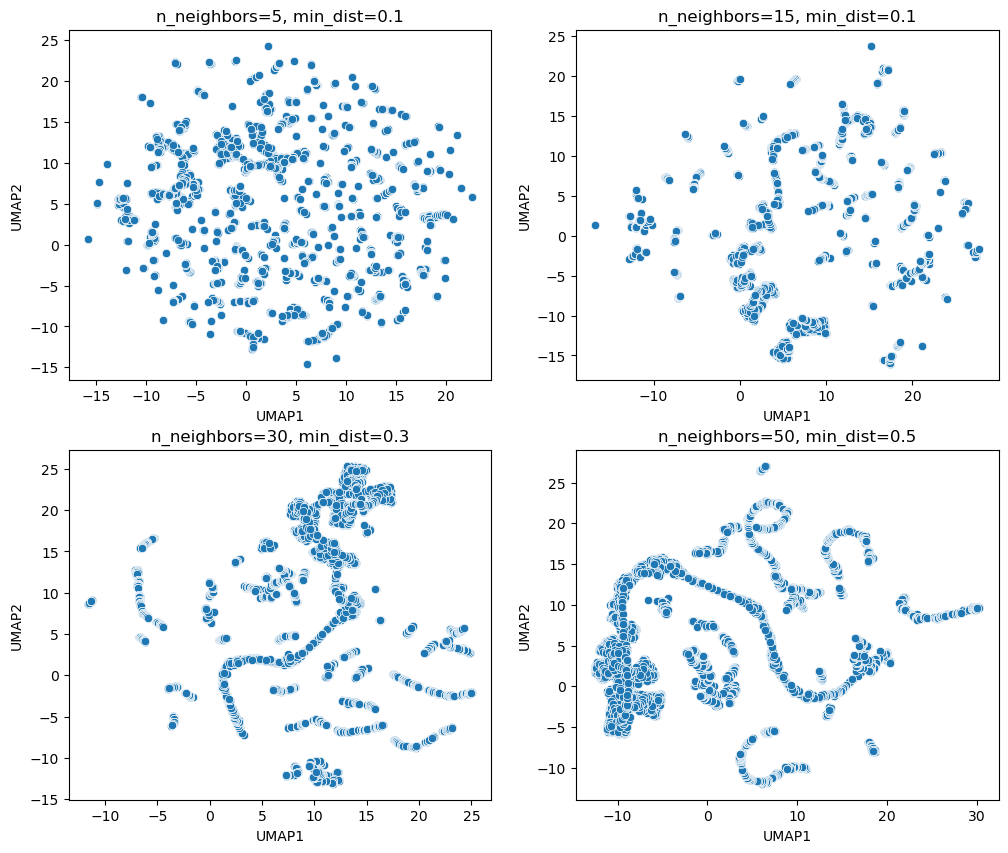

In [53]:
params_umap = [(5, 0.1), (15, 0.1), (30, 0.3), (50, 0.5)]
fig, axes = plt.subplots(2, 2, figsize=(12,10))

for (n, d), ax in zip(params_umap, axes.flatten()):
    reducer = umap.UMAP(n_neighbors=n, min_dist=d, n_components=2, random_state=42)
    embedding = reducer.fit_transform(X)
    df_plot = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
    sns.scatterplot(data=df_plot, x='UMAP1', y='UMAP2', ax=ax, palette='tab10')
    ax.set_title(f'n_neighbors={n}, min_dist={d}')

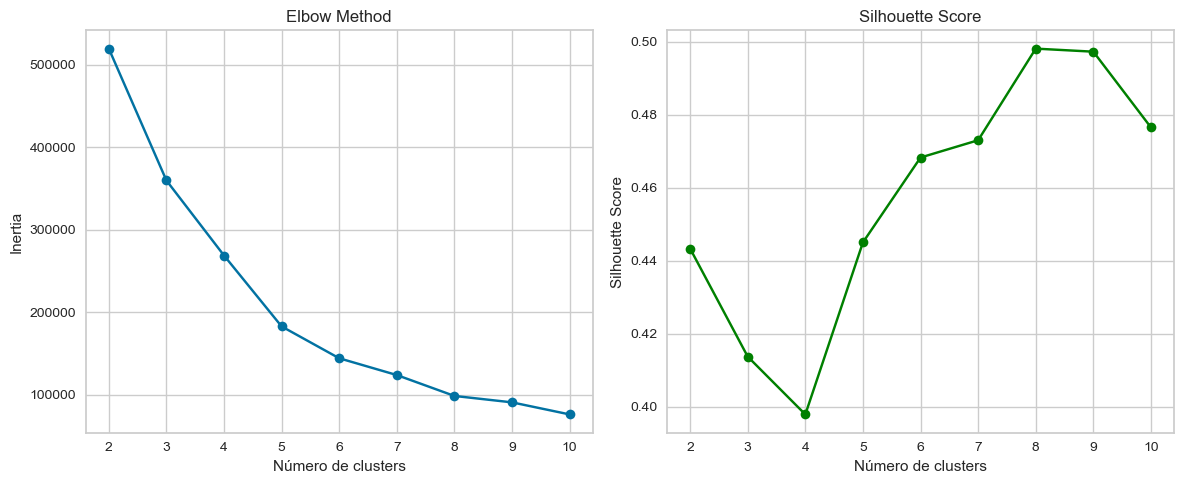

In [28]:
# fazendo o umap com o 'melhor' par de parâmetros e depois aplicando o kmeans sobre esses dados
# as técnicas elbow method e silhouette score também são aplicadas

umap_reducer = umap.UMAP(n_neighbors=50, min_dist=0.5, n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = c.KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_umap)

    inertia = kmeans.inertia_
    sil_score = mt.silhouette_score(X_umap, labels)

    inertias.append(inertia)
    silhouette_scores.append(sil_score)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(k_range, inertias, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Número de clusters')
ax[0].set_ylabel('Inertia')

ax[1].plot(k_range, silhouette_scores, marker='o', color='green')
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Número de clusters')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

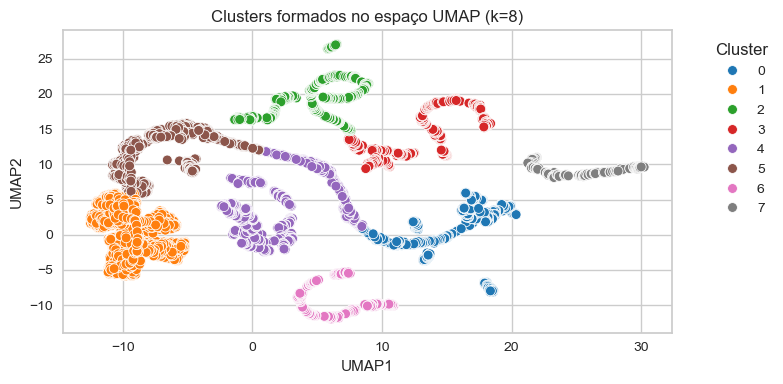

In [29]:
# com o resultado do elbow method e do silhouette score, foi escolhido k=8
# o umap e o kmeans são aplicados (idem ao feito acima) usando esse número de clusters k

umap_reducer = umap.UMAP(n_neighbors=50, min_dist=0.5, n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

kmeans = c.KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(X_umap)

# usando os labels gerados pelo kmeans (labels = a qual cluster pertence a linha do df)
df_plot = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_plot['cluster'] = clusters

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_plot, x='UMAP1', y='UMAP2', hue='cluster', palette='tab10', s=50)
plt.title('Clusters formados no espaço UMAP (k=8)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 5.3.3 **t-SNE (t-distributed Stochastic Neighbor Embedding)**

In [ ]:
# o t-SNE também precisa de valores padronizados

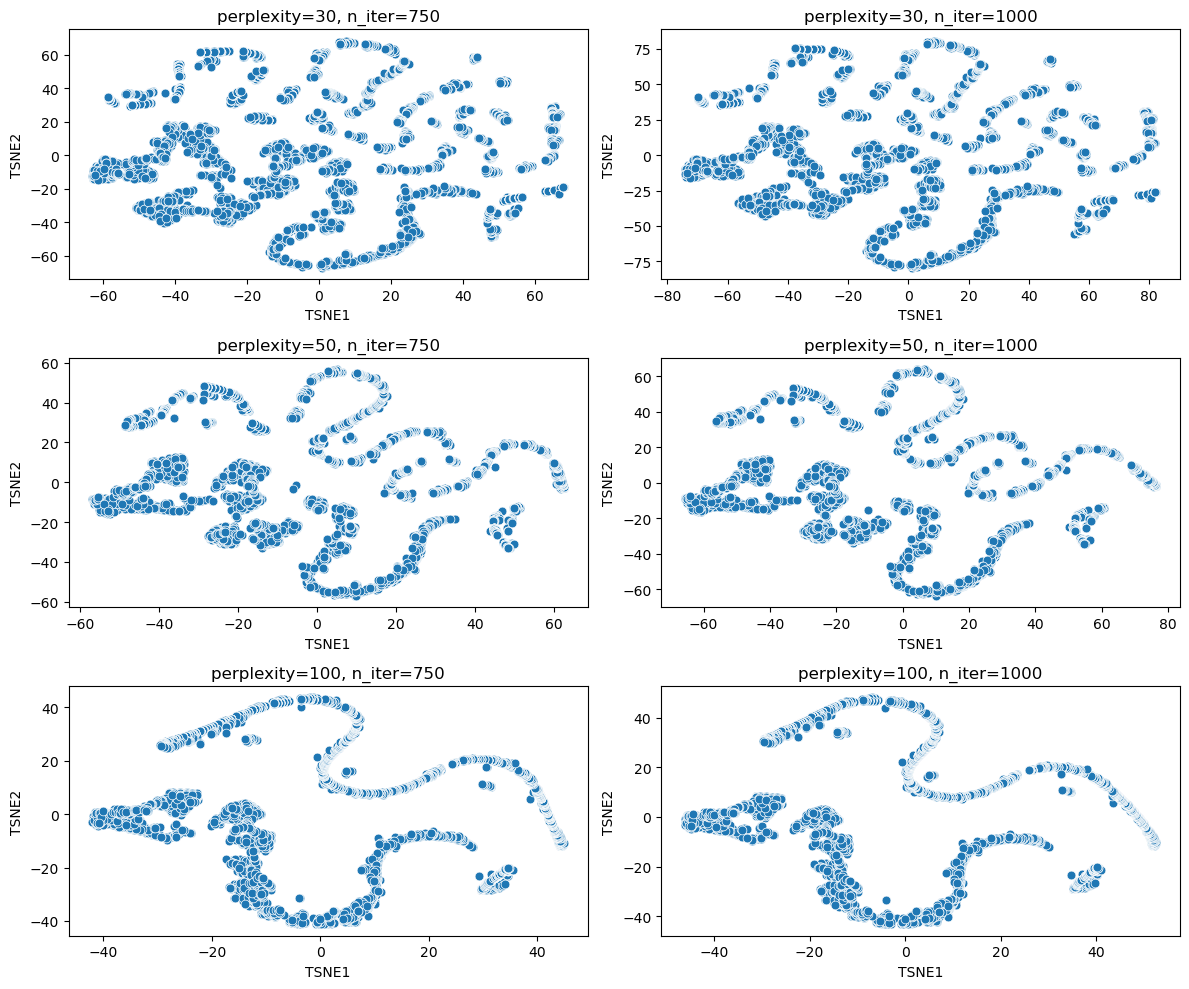

In [56]:
perplexities = [30, 50, 100]
n_iters = [750, 1000]

fig, axes = plt.subplots(len(perplexities), len(n_iters), figsize=(12, 10))

for i, p in enumerate(perplexities):
    for j, n in enumerate(n_iters):
        tsne = mn.TSNE(n_components=2, perplexity=p, n_iter=n, random_state=42)
        tsne_result = tsne.fit_transform(X)
        
        df_tsne = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
        
        ax = axes[i, j]
        sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', palette='tab10', s=40, ax=ax, legend=False)
        ax.set_title(f'perplexity={p}, n_iter={n}')
        
plt.tight_layout()
plt.show()

#### 5.3.4 **Tree-based embedding** 

In [ ]:
# ao usar um algoritmo de árvore para fazer o embbeding é como se 'transformássemos' o problema em um supervisionado
# para isso, precisamos de uma variável alvo (para esse problema de negócio, foi escolhido o 'gross_revenue')
# o modelo é treinado normalmente e, depois, criamos um dataframe (df_leaf) com as posições geradas por cada folha
# é sobre esse 'espaço' que vamos fazer o umap

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

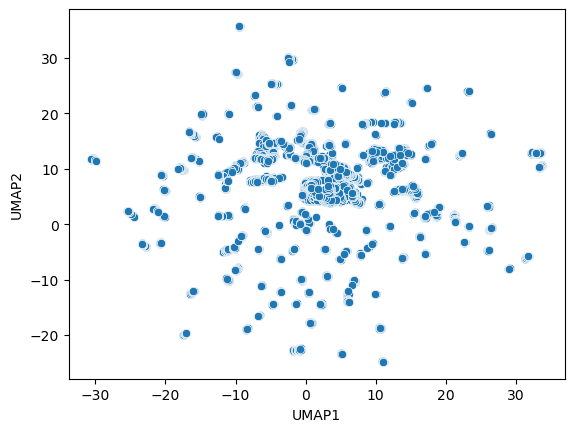

In [58]:
X = df4.drop(columns=['customer_id', 'gross_revenue'], axis=1)
y = df4['gross_revenue']

rf_model = en.RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

df_leaf = pd.DataFrame(rf_model.apply(X))

reducer_tree = umap.UMAP(n_neighbors=50, min_dist=0.5, n_components=2, random_state=42)
embedding_tree = reducer_tree.fit_transform(df_leaf)

df_tree = pd.DataFrame(embedding_tree, columns=['UMAP1', 'UMAP2'])
sns.scatterplot(data=df_tree, x='UMAP1', y='UMAP2')

In [ ]:
# vemos alguns clusters mas, talvez, seja necessário criar mais features para as análises.

# 6.0 Data Preparation

In [30]:
df5 = df4.copy()

In [31]:
mm = pp.MinMaxScaler()

df5['gross_revenue'] = mm.fit_transform(df5[['gross_revenue']])
df5['recency_days']  = mm.fit_transform(df5[['recency_days']])
df5['frequency']     = mm.fit_transform(df5[['frequency']])
df5['qtde_returns']  = mm.fit_transform(df5[['qtde_returns']])

# 7.0 Hyperparameter fine-tuning

In [32]:
X = df5.drop(columns=['customer_id']).copy()

In [ ]:
# Para esse ciclo, o fine tuning será feito usando os algoritmos K-means e Hierarchical Clustering
# a análise dos resultados será através das métricas:
# WSS --> soma dos quadrados das distâncias entre os pontos de um cluster e o seu centróide -> menor valor, melhor
# SS --> combina coesão interna e separação entre clusters -> mais próximo de 1, melhor
# DBI --> mede a "semelhança" entre clusters, penalizando sobreposição -> mais próximo de zero, melhor
# CHI --> razão entre dispersão entre clusters / dentro dos clusters -> maior valor, melhor

# WSS: Within-Cluster Sum of Squares
# SS: Silhouette Score
# DBI: Davies-Bouldin Index	
# CHI: Calinski-Harabasz Index

#### 7.1 **K-means**

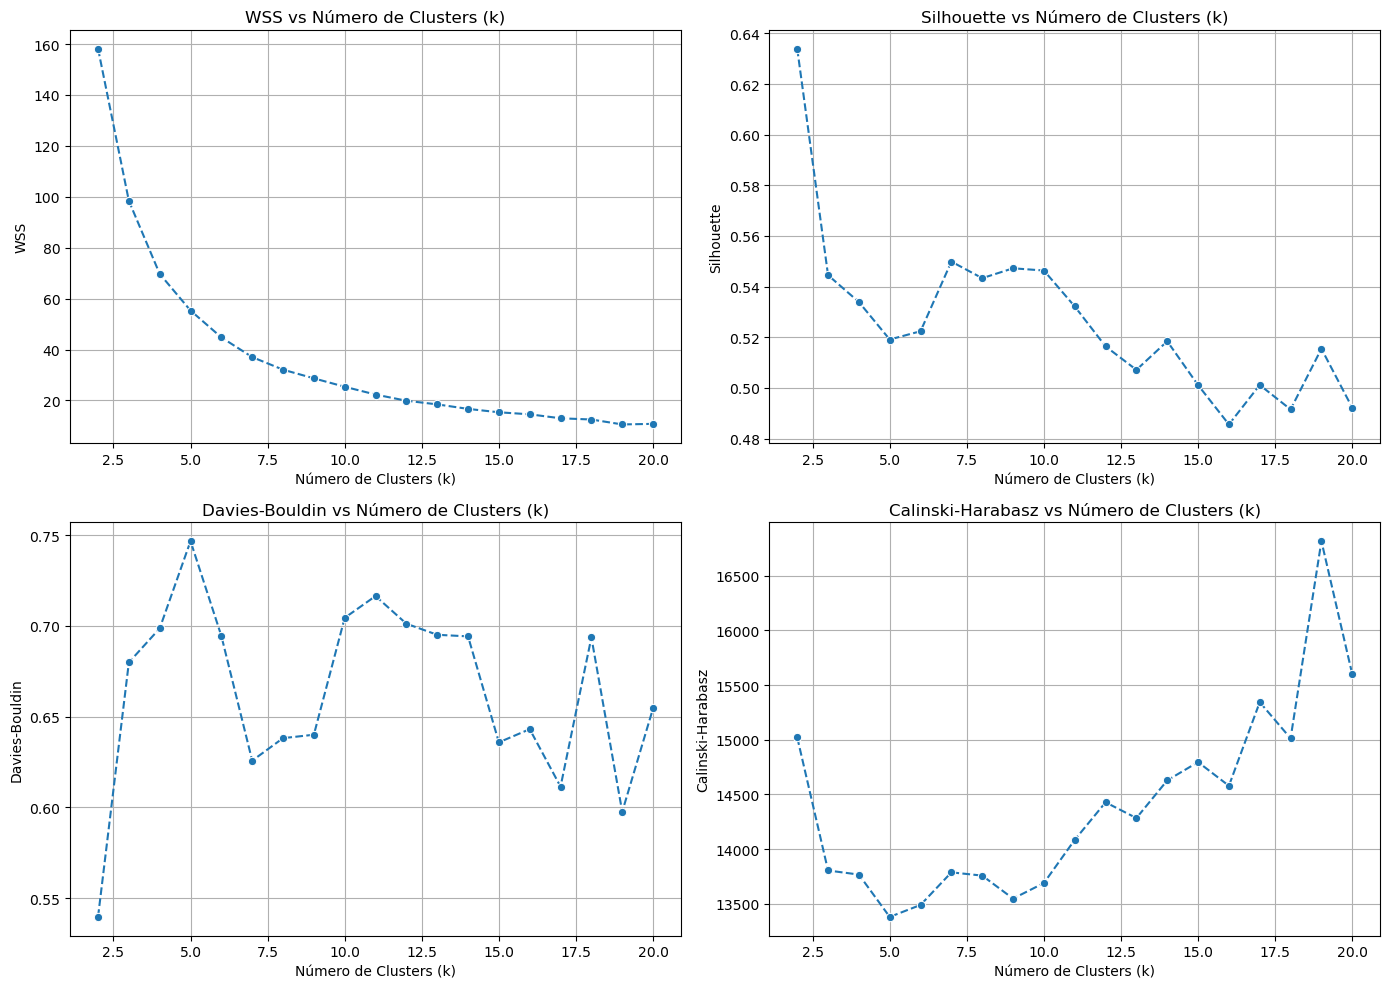

In [62]:
clusters = np.arange(2, 21, 1)
results=[]
for k in clusters:
    kmeans_model = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans_model.fit(X)
    km_labels = kmeans_model.predict(X)

    result_kmeans = {
        'model': 'KMeans',
        'k': k,
        'WSS': kmeans_model.inertia_,
        'Silhouette': mt.silhouette_score(X, km_labels),
        'Davies-Bouldin': mt.davies_bouldin_score(X, km_labels),
        'Calinski-Harabasz': mt.calinski_harabasz_score(X, km_labels)}
    results.append(result_kmeans)
    
df_kmeans = pd.DataFrame(results)

metrics = ['WSS', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df_kmeans, x='k', y=metric, marker='o', linestyle='--')
    plt.title(f'{metric} vs Número de Clusters (k)')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

#### 7.2 **Hierarchical Clustering**

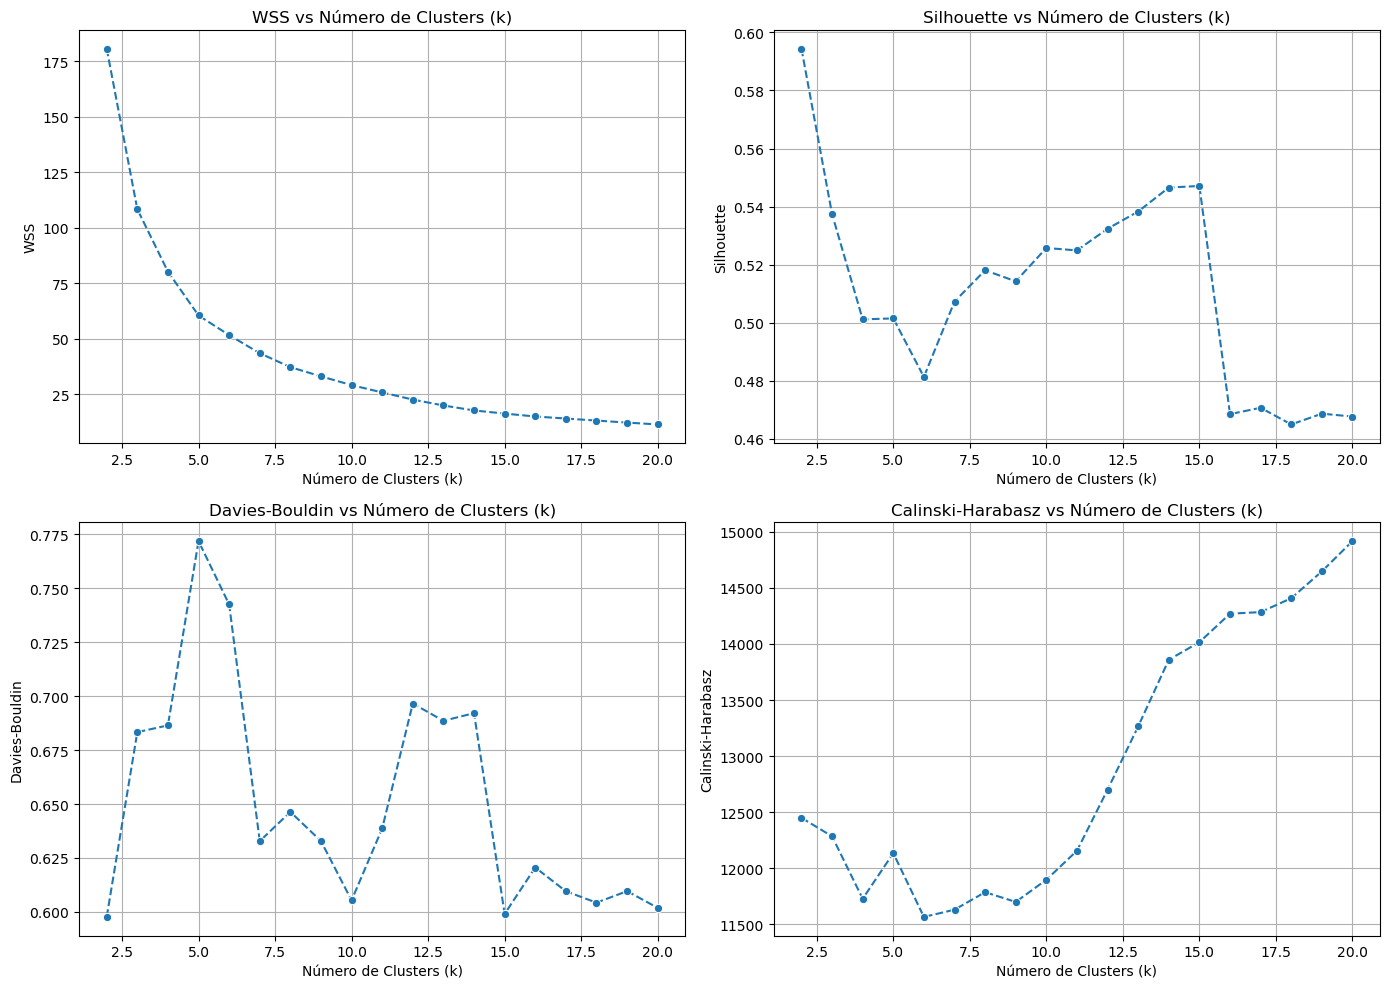

In [63]:
clusters = np.arange(2, 21, 1)
results=[]

def calculate_wss(X, labels):
    X = np.array(X)
    wss = 0
    for cluster in np.unique(labels):
        points = X[labels == cluster]
        centroid = points.mean(axis=0)
        wss += np.sum((points - centroid) ** 2)
    return float(wss)

for k in clusters:
    hc_model = c.AgglomerativeClustering(n_clusters=k, linkage='ward')
    hc_labels = hc_model.fit_predict(X)
    
    result_hierarchical = {
        'k': k,
        'WSS': calculate_wss(X, hc_labels),
        'Silhouette': mt.silhouette_score(X, hc_labels),
        'Davies-Bouldin': mt.davies_bouldin_score(X, hc_labels),
        'Calinski-Harabasz': mt.calinski_harabasz_score(X, hc_labels)}
    results.append(result_hierarchical)

df_hc = pd.DataFrame(results)

metrics = ['WSS', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df_hc, x='k', y=metric, marker='o', linestyle='--')
    plt.title(f'{metric} vs Número de Clusters (k)')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

#### 7.3 **K-means com dados gerados pelo PCA** 

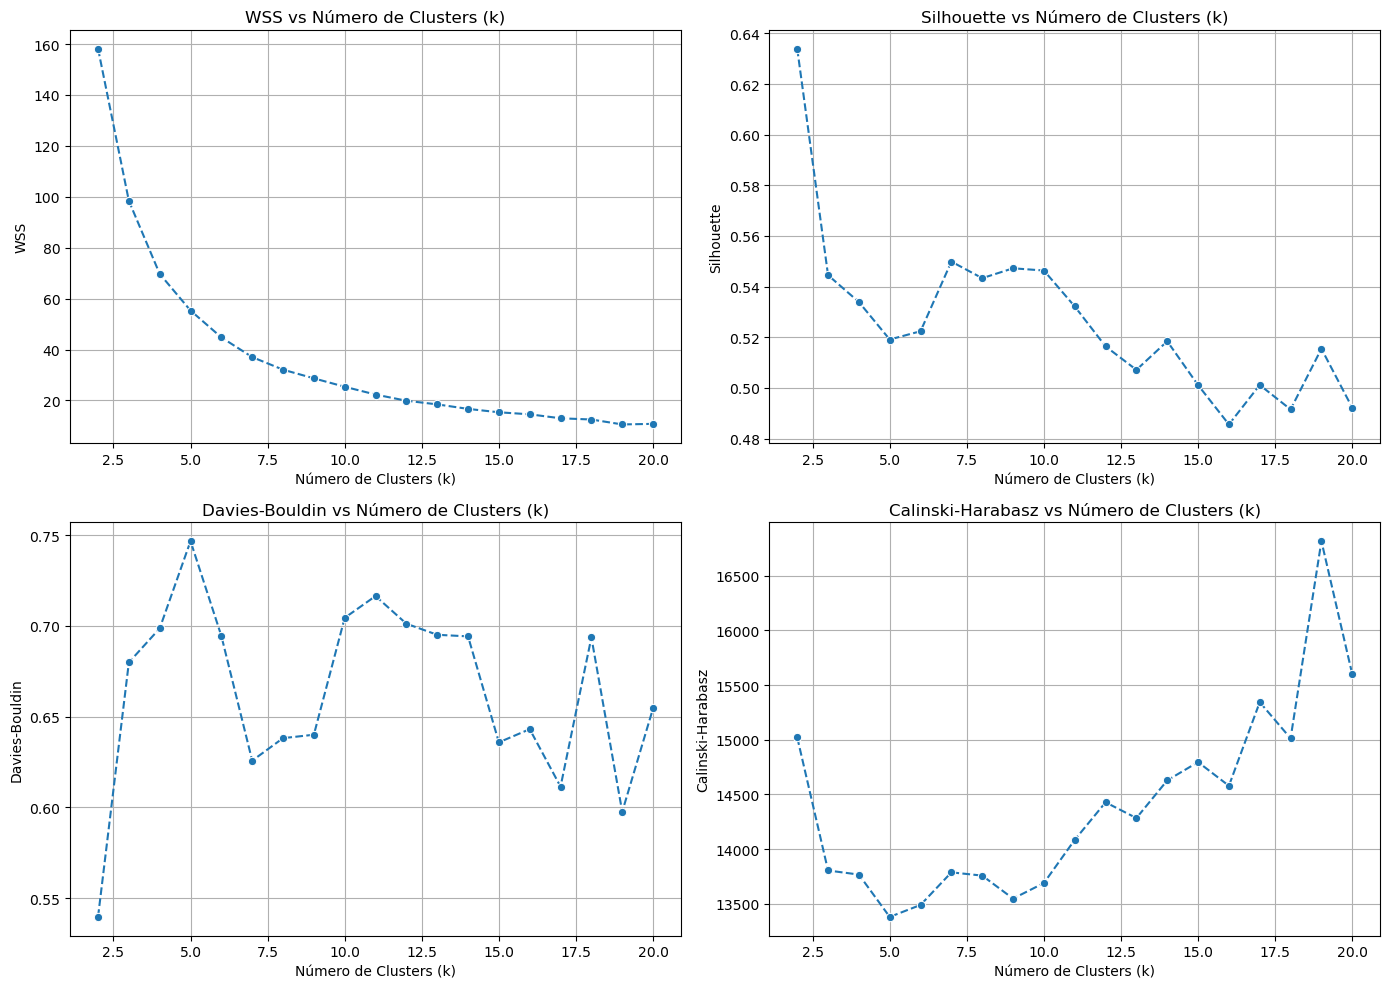

In [45]:
clusters = np.arange(2, 21, 1)
results=[]
for k in clusters:
    kmeans_model_pca = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans_model_pca.fit(df_pca)
    km_labels = kmeans_model_pca.predict(df_pca)

    result_kmeans_pca = {
        'model': 'KMeans',
        'k': k,
        'WSS': kmeans_model_pca.inertia_,
        'Silhouette': mt.silhouette_score(df_pca, km_labels),
        'Davies-Bouldin': mt.davies_bouldin_score(df_pca, km_labels),
        'Calinski-Harabasz': mt.calinski_harabasz_score(df_pca, km_labels)}
    results.append(result_kmeans_pca)
    
df_kmeans_pca = pd.DataFrame(results)

metrics = ['WSS', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df_kmeans_pca, x='k', y=metric, marker='o', linestyle='--')
    plt.title(f'{metric} vs Número de Clusters (k)')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

#### 7.4 **Hierarchical Clustering usando os dados do PCA**

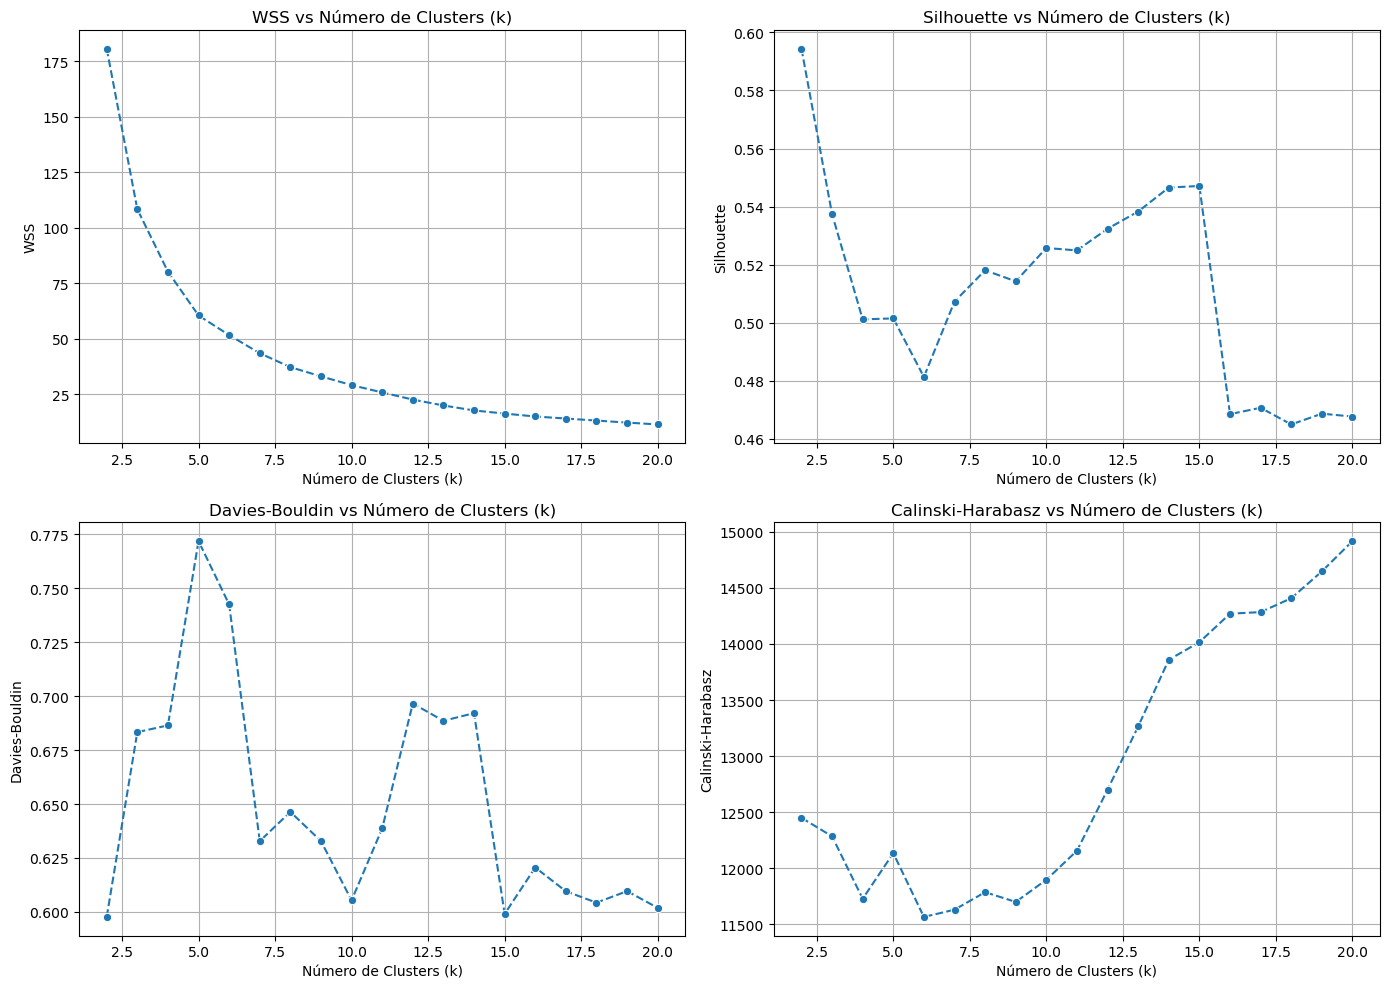

In [46]:
clusters = np.arange(2, 21, 1)
results=[]

def calculate_wss(X, labels):
    X = np.array(X)
    wss = 0
    for cluster in np.unique(labels):
        points = X[labels == cluster]
        centroid = points.mean(axis=0)
        wss += np.sum((points - centroid) ** 2)
    return float(wss)

for k in clusters:
    hc_model_pca = c.AgglomerativeClustering(n_clusters=k, linkage='ward')
    hc_labels = hc_model_pca.fit_predict(df_pca)
    
    result_hierarchical_pca = {
        'k': k,
        'WSS': calculate_wss(df_pca, hc_labels),
        'Silhouette': mt.silhouette_score(df_pca, hc_labels),
        'Davies-Bouldin': mt.davies_bouldin_score(df_pca, hc_labels),
        'Calinski-Harabasz': mt.calinski_harabasz_score(df_pca, hc_labels)}
    results.append(result_hierarchical_pca)

df_hc_pca = pd.DataFrame(results)

metrics = ['WSS', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df_hc_pca, x='k', y=metric, marker='o', linestyle='--')
    plt.title(f'{metric} vs Número de Clusters (k)')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# como não houve redução na dimensionalidade ao fazer o PCA, o que acaba acontecendo é uma rotação linear
# dos dados que não afeta a distância entre os pontos. A consequência é o mesmo resultado para as métricas
# entre os dados do dataframe X e do dataframe df_pca.

#### 7.5 **K-means com dados gerados pelo UMAP**

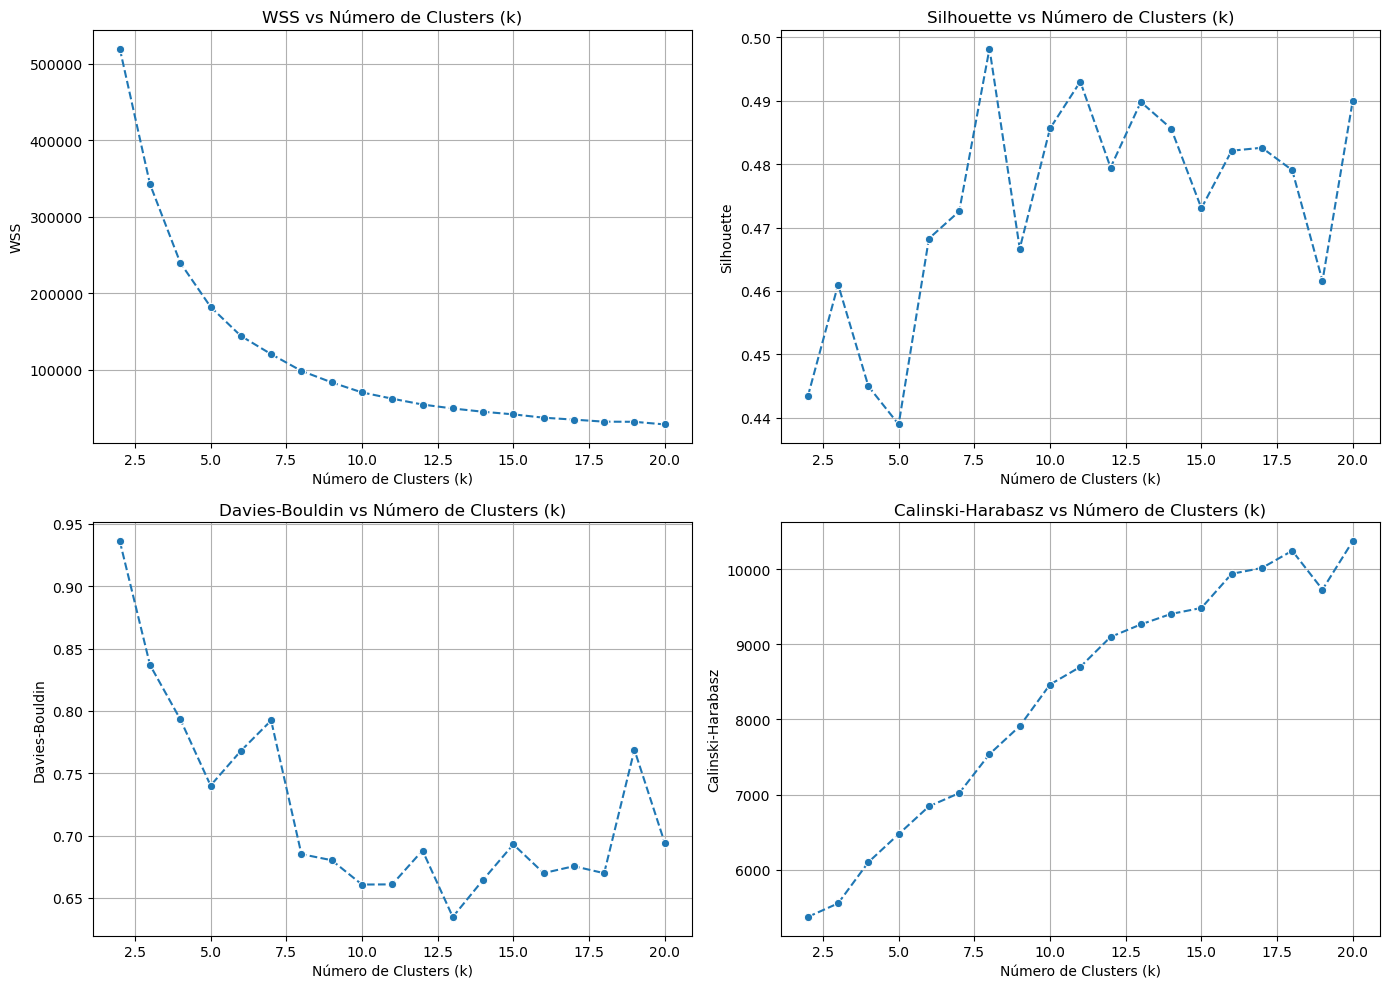

In [64]:
clusters = np.arange(2, 21, 1)
results=[]
for k in clusters:
    kmeans_model_umap = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans_model_umap.fit(X_umap)
    km_labels = kmeans_model_umap.predict(X_umap)

    result_kmeans_umap = {
        'model': 'KMeans',
        'k': k,
        'WSS': kmeans_model_umap.inertia_,
        'Silhouette': mt.silhouette_score(X_umap, km_labels),
        'Davies-Bouldin': mt.davies_bouldin_score(X_umap, km_labels),
        'Calinski-Harabasz': mt.calinski_harabasz_score(X_umap, km_labels)}
    results.append(result_kmeans_umap)
    
df_kmeans_umap = pd.DataFrame(results)

metrics = ['WSS', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df_kmeans_umap, x='k', y=metric, marker='o', linestyle='--')
    plt.title(f'{metric} vs Número de Clusters (k)')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

#### 7.6 **Hierarchical Clustering com dados gerados pelo UMAP**

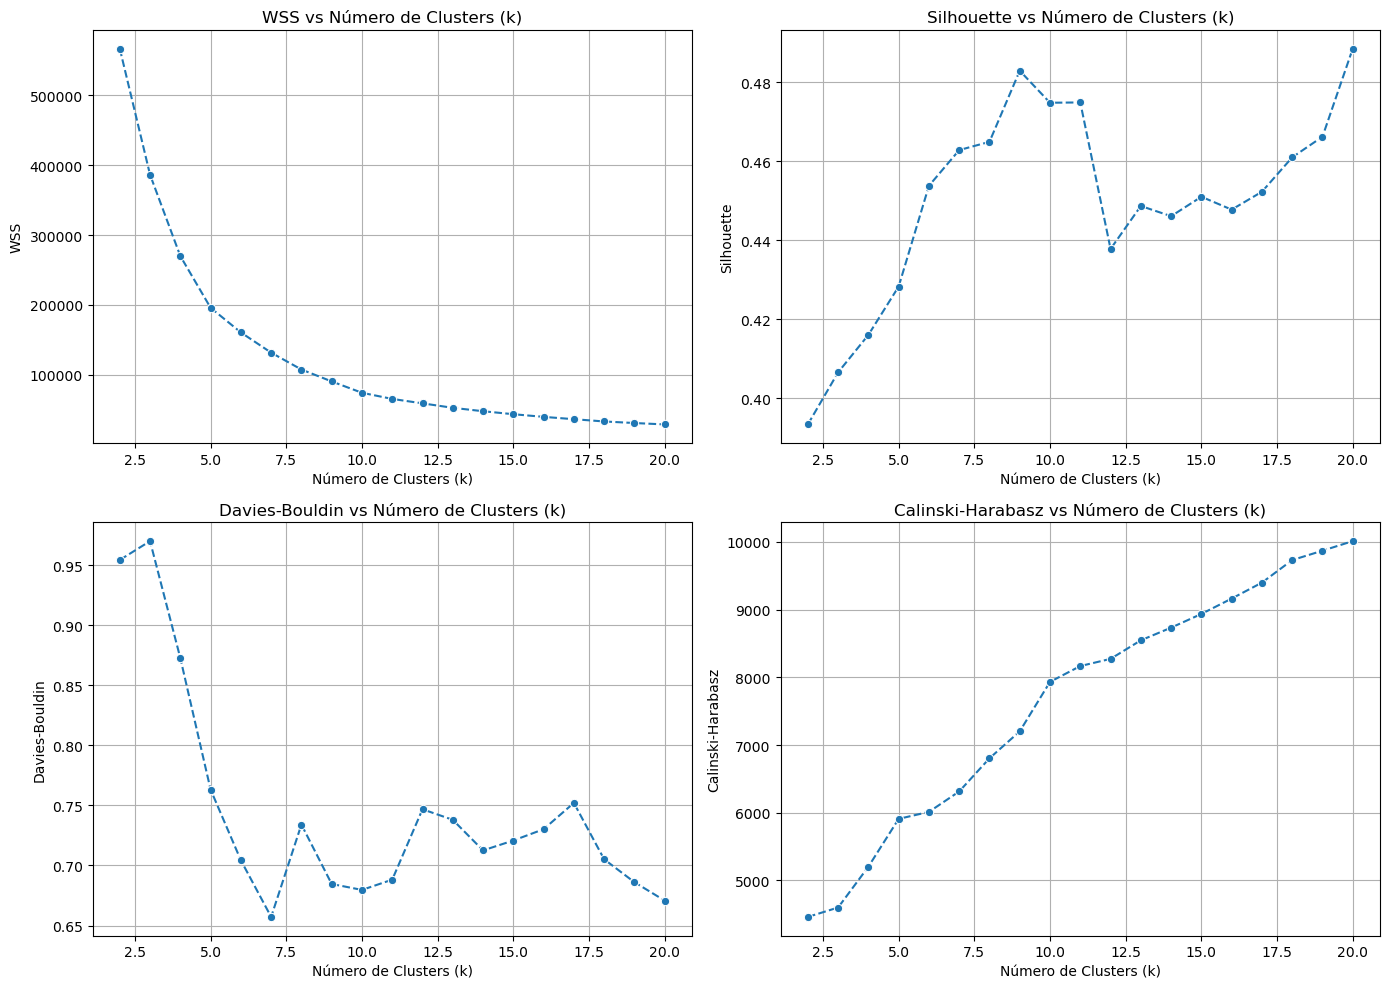

In [65]:
clusters = np.arange(2, 21, 1)
results=[]

def calculate_wss(X, labels):
    X = np.array(X)
    wss = 0
    for cluster in np.unique(labels):
        points = X[labels == cluster]
        centroid = points.mean(axis=0)
        wss += np.sum((points - centroid) ** 2)
    return float(wss)

for k in clusters:
    hc_model_umap = c.AgglomerativeClustering(n_clusters=k, linkage='ward')
    hc_labels = hc_model_umap.fit_predict(X_umap)
    
    result_hierarchical_umap = {
        'k': k,
        'WSS': calculate_wss(X_umap, hc_labels),
        'Silhouette': mt.silhouette_score(X_umap, hc_labels),
        'Davies-Bouldin': mt.davies_bouldin_score(X_umap, hc_labels),
        'Calinski-Harabasz': mt.calinski_harabasz_score(X_umap, hc_labels)}
    results.append(result_hierarchical_umap)

df_hc_umap = pd.DataFrame(results)

metrics = ['WSS', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df_hc_umap, x='k', y=metric, marker='o', linestyle='--')
    plt.title(f'{metric} vs Número de Clusters (k)')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# com os dados gerados pelo UMAP, como há a redução de dimensão, tem a variação nos valores das métricas
# no entanto, as métricas apresentam faixas de valores que são 'piores' do que aqueles resultantes do
# dataframe X. 
# Por ex.: SS mais próximo de 1 é melhor. Para X, no k-means, os valores estão na faixa de 0,64-0,48 e, 
# para X_umap, 0,5-0,44.
# logo, a escolha por manter o uso do dataframe X.

#### 7.7 **Análise da Silhouette Score**

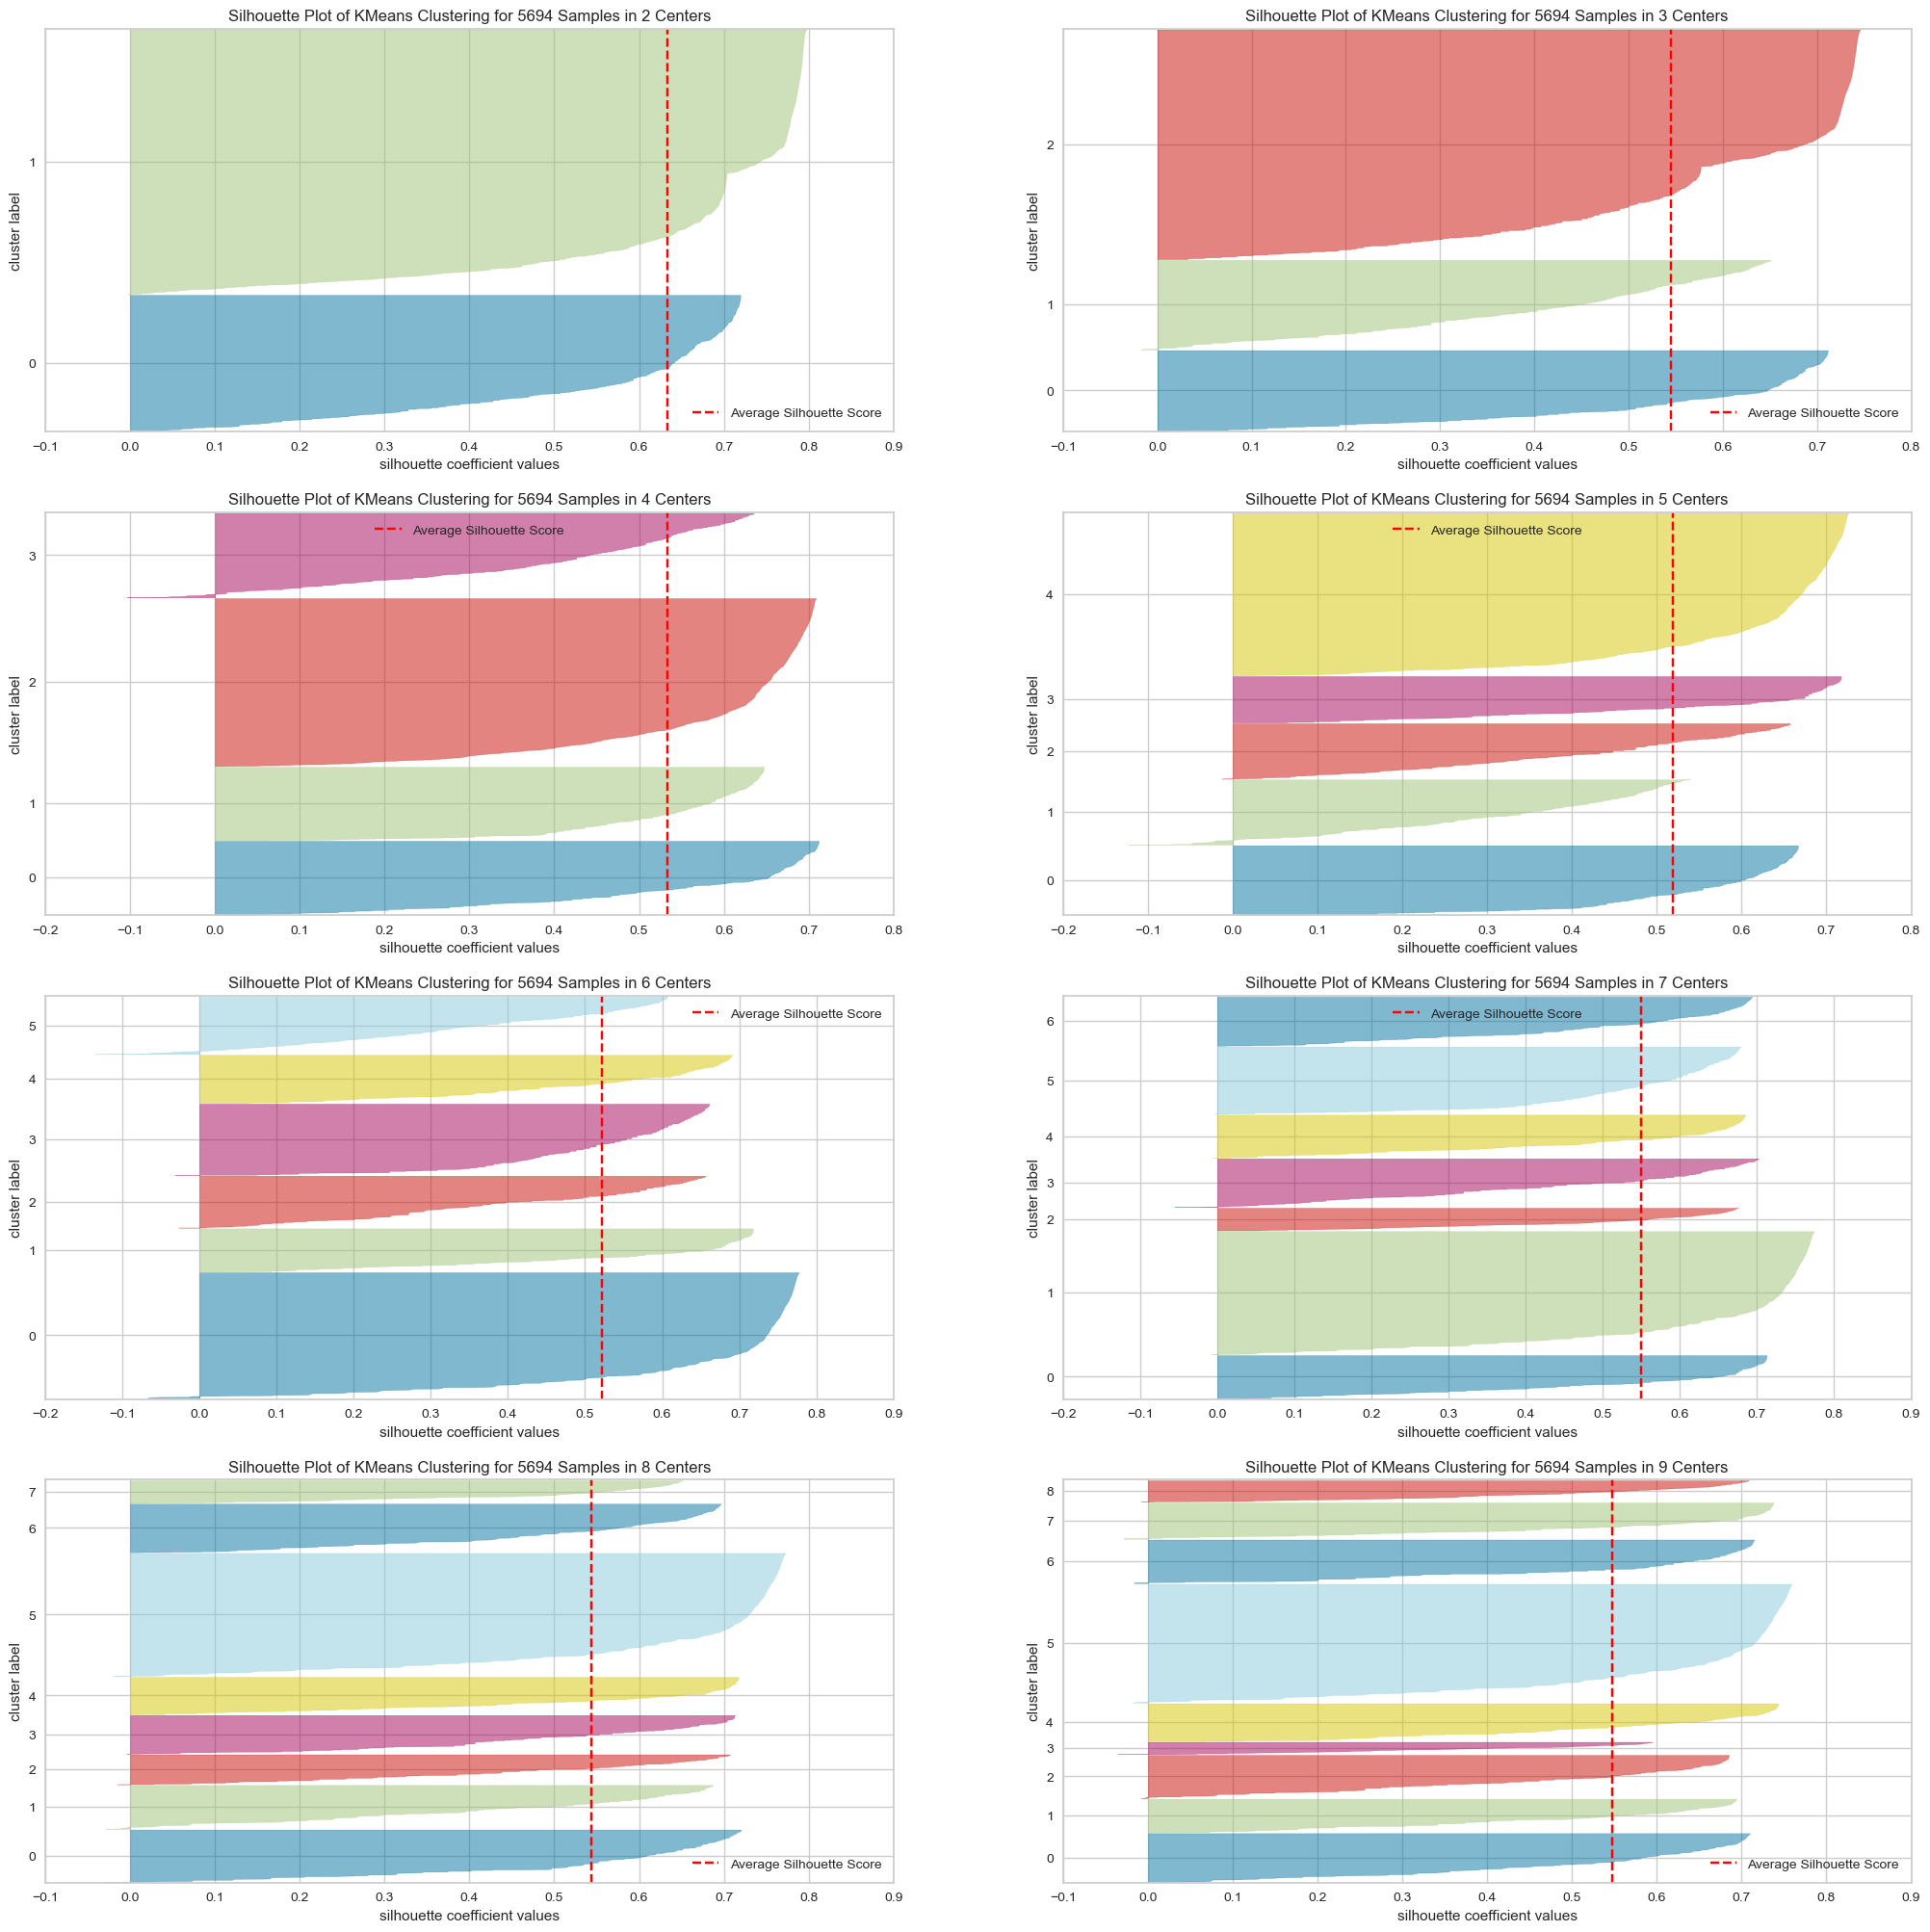

In [73]:
fig, ax = plt.subplots(4, 2, figsize=(25, 25))
clusters=[2, 3, 4, 5, 6, 7, 8, 9]

for k in clusters:
    kmean = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    visualizer = SilhouetteVisualizer(kmean, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize()

#### 7.8 **Dendrograma**

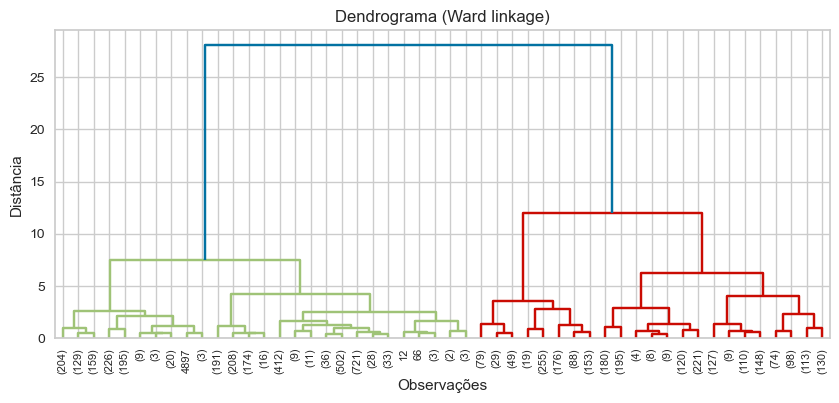

In [84]:
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 4))
dendrogram(linked, truncate_mode='lastp', p=50)
plt.title("Dendrograma (Ward linkage)")
plt.xlabel("Observações")
plt.ylabel("Distância")
plt.show()

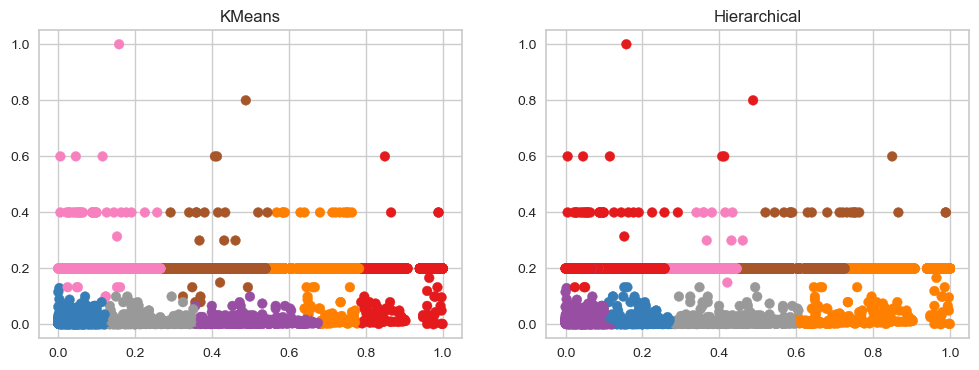

In [96]:
# cortando o dendrograma para obter 7 clusters
clusters = fcluster(linked, t=7, criterion='maxclust')

kmeans_model = c.KMeans(init='random', n_clusters=7, n_init=10, max_iter=300, random_state=42)
kmeans_model.fit(X)
km_labels = kmeans_model.predict(X)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# as colunas de X escolhidas são aquelas referentes às variáveis com maior contribuição às PCs
# que foram recency_days e frequency:

axes[0].scatter(X.iloc[:, 1], X.iloc[:, 2], c=km_labels, cmap='Set1')
axes[0].set_title("KMeans")

axes[1].scatter(X.iloc[:, 1], X.iloc[:, 2], c=clusters, cmap='Set1')
axes[1].set_title("Hierarchical")

plt.show()

# 8.0 Model training

In [ ]:
# baseando nos resultados da seção anterior, para uma análise inicial, vamos usar o K-means
# e o dataframe X. considerando um cenário mais geral, menos de 10 clusters pode ser interessante,
# uma vez que não irá criar grupos muito específicos e, mais que 2 clusters para não ter grupos
# heterogêneos demais. usando essa limitação, o número de clusters k=7 apresenta boas métricas.

### 8.1 **K-Means**

In [33]:
k = 7
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

print('WSS value: {:.3f}'.format(kmeans.inertia_))
print('SS value: {:.3f}'.format(mt.silhouette_score(X, labels, metric='euclidean')))

WSS value: 37.032
SS value: 0.550


# 9.0 Cluster Analysis

In [34]:
df6 = df4.copy() # df4 possui os dados sem aplicar o minmaxscaler
df6['cluster'] = labels

In [35]:
df6.head()

customer_id  gross_revenue  recency_days  frequency  qtde_returns  cluster
0      17850.0        5303.48         372.0   0.486111          37.0        0
1      13047.0        3089.10          56.0   0.048780          35.0        6
2      12583.0        6629.34           2.0   0.045699          50.0        1
3      13748.0         948.25          95.0   0.017921           0.0        6
4      15100.0         635.10         333.0   0.136364          22.0        0

### 9.1 **Inspeção visual**

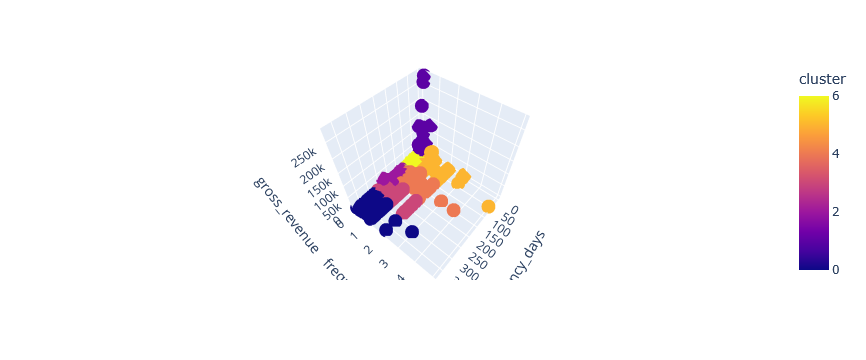

In [103]:
fig = px.scatter_3d(df6, x='recency_days', y='frequency', z='gross_revenue', color='cluster')
fig.show()

### 9.2 **Cluster Profile**

In [36]:
# número de customers
df_cluster = df6[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = (df_cluster['customer_id'] / df_cluster['customer_id'].sum()) * 100

# gross revenue média
df_avg_gross_revenue = df6[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

# recency days média
df_avg_recency_days = df6[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')

# frequency média
df_avg_frequency = df6[['frequency', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_frequency, how='inner', on='cluster')

# qtde returns média
df_avg_qtde_returns = df6[['qtde_returns', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_qtde_returns, how='inner', on='cluster')

# gross revenue total do cluster
aux = df6[['gross_revenue', 'cluster']].groupby('cluster').sum().reset_index()
df_cluster = pd.merge(df_cluster, aux.rename(columns={'gross_revenue': 'gross_revenue_total'}), how='inner', on='cluster')

In [37]:
df_cluster = df_cluster.sort_values(by='gross_revenue', ascending=False)
df_cluster

cluster  customer_id  perc_customer  gross_revenue  recency_days  \
1        1         1768      31.050228    3637.650543     17.272059   
6        6          703      12.346329    1307.973627     78.655761   
5        5          967      16.982789     903.575791     44.998966   
2        2          324       5.690200     888.851358    183.848765   
0        0          618      10.853530     762.410356    336.459547   
4        4          617      10.835968     683.375802    154.163695   
3        3          697      12.240955     550.324835    249.212339   

   frequency  qtde_returns  gross_revenue_total  
1   0.047401     42.344457           6431366.16  
6   0.040763     12.120910            919505.46  
5   1.036096      1.483971            873757.79  
2   0.054744     12.802469            287987.84  
0   0.908999      1.483819            471169.60  
4   1.023312      0.322528            421642.87  
3   0.948457      3.879484            383576.41

In [ ]:
### Cluster 01:  (Candidato à Insider)
    - Número de customers: 1768 (31,05% dos customers total)
    - Receita média: $3637,6 
    - Recência média: 17 dias
    - Frequência de compra média: 0,047/dia
    - Quantidade de retornos média: 42 
    - Receita total do cluster: $6.431.366,16 (65,69% do faturamento total)
        
### Cluster 06: 
    - Número de customers: 703 (12,34% dos customers total)
    - Receita média: $1307,9
    - Recência média: 78 dias
    - Frequência média: 0,040/dia
    - Quantidade de retornos média: 12
    - Receita total do cluster: $919.505,46 (9,39% do faturameno total)
        
### Cluster 05: 
    - Número de customers: 967 (16,98% do customers)
    - Receita média: $903,57
    - Recência média: 45 dias
    - Frequência média: 1,03/dia
    - Quantidade de retornos média: 1,5
    - Receita total do cluster: $873.757,79 (8,92% do faturamento total)

### Cluster 02: 
    - Número de customers: 324 (5,69% dos customers total)
    - Receita média: $888,85
    - Recência média: 183 dias
    - Frequência média: 0,05/dia
    - Quantidade de retornos média: 13
    - Receita total do cluster: $287.987,84 (2,94% do faturamento total)

### Cluster 00: 
    - Número de customers: 618 (10,85% dos customers total)
    - Receita média: $762,41
    - Recência média: 336 dias
    - Frequência média: 0,90/dia
    - Quantidade de retornos média: 1,5
    - Receita total do cluster: $471.169,60 (4,81% do faturamento total)

### Cluster 04: 
    - Número de customers: 617 (10,83% dos customers total)
    - Receita média: $683,37
    - Recência média: 154 dias
    - Frequência média: 1,02/dia
    - Quantidade de retornos média: 0,3
    - Receita total do cluster: $421.642,87 (4,30% do faturamento total)

### Cluster 03: 
    - Número de customers: 697 (12,24% dos customers total)
    - Receita média: $550,32
    - Recência média: 249 dias
    - Frequência média: 0,94/dia
    - Quantidade de retornos média: 4
    - Receita total do cluster: $383.576,41 (3,91% do faturamento total)